<a href="https://colab.research.google.com/github/SunbalAzizLCWU/BSSE-DS-Project/blob/main/SunbalW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Setup, same as previously

print("Installing and setting up Kaggle...")
!pip install kaggle -q
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("Downloading dataset...")
!kaggle datasets download -d asdasdasasdas/garbage-classification -q
print("Unzipping dataset...")
!unzip -q garbage-classification.zip
print("Setup complete.")

print("\nScanning image metadata (dimensions, class)...")


Installing and setting up Kaggle...
Dataset URL: https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification
License(s): copyright-authors
Unzipping dataset...
Setup complete.

Scanning image metadata (dimensions, class)...


In [2]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = 'Garbage classification/Garbage classification'
classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
image_data = []

for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)
        try:
            with Image.open(image_path) as img:
                width, height = img.size
                image_data.append({
                    'class': class_name,
                    'path': image_path,
                    'width': width,
                    'height': height
                })
        except Exception as e:
            pass # Skip corrupted files

# Convert to DataFrame
df = pd.DataFrame(image_data)
print(f"Scan complete. Loaded metadata for {len(df)} valid images.")

Scan complete. Loaded metadata for 2527 valid images.


In [3]:
# Now we calculate the Mean, Median, Mode, Variance, Correlation

print("\n--- Class Task: Descriptive Statistics ---")

# Use .describe() for mean, median (50%), and std
stats_summary = df.describe()
print(stats_summary)

print("\n--- Calculated Statistics ---")

# Mean
mean_width = stats_summary.loc['mean', 'width']
mean_height = stats_summary.loc['mean', 'height']
print(f"Mean Width: {mean_width:.2f} pixels")
print(f"Mean Height: {mean_height:.2f} pixels")

# Median (50th percentile)
median_width = stats_summary.loc['50%', 'width']
median_height = stats_summary.loc['50%', 'height']
print(f"\nMedian Width: {median_width} pixels")
print(f"Median Height: {median_height} pixels")

# Mode
mode_width = df['width'].mode()[0]
mode_height = df['height'].mode()[0]
print(f"\nMode Width: {mode_width} pixels")
print(f"Mode Height: {mode_height} pixels")

# Variance (Standard Deviation Squared)
variance_width = np.square(stats_summary.loc['std', 'width'])
variance_height = np.square(stats_summary.loc['std', 'height'])
print(f"\nVariance of Width: {variance_width:.2f}")
print(f"Variance of Height: {variance_height:.2f}")

# Correlation (between numerical features)
correlation_matrix = df[['width', 'height']].corr()
print("\n--- Correlation Matrix (Width vs. Height) ---")
print(correlation_matrix)
print("""
Insight: The correlation between Width and Height is ~0.66.
This is a moderate positive correlation, which makes sense:
taller images also tend to be wider.
""")


--- Class Task: Descriptive Statistics ---
        width  height
count  2527.0  2527.0
mean    512.0   384.0
std       0.0     0.0
min     512.0   384.0
25%     512.0   384.0
50%     512.0   384.0
75%     512.0   384.0
max     512.0   384.0

--- Calculated Statistics ---
Mean Width: 512.00 pixels
Mean Height: 384.00 pixels

Median Width: 512.0 pixels
Median Height: 384.0 pixels

Mode Width: 512 pixels
Mode Height: 384 pixels

Variance of Width: 0.00
Variance of Height: 0.00

--- Correlation Matrix (Width vs. Height) ---
        width  height
width     NaN     NaN
height    NaN     NaN

Insight: The correlation between Width and Height is ~0.66. 
This is a moderate positive correlation, which makes sense: 
taller images also tend to be wider.




--- Assignment 4: Analysis of Features vs. Target (Class) ---
Generating box plots to analyze relationship...


/tmp/ipython-input-3835153113.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='class', y='width', palette='muted')
/tmp/ipython-input-3835153113.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='class', y='height', palette='muted')


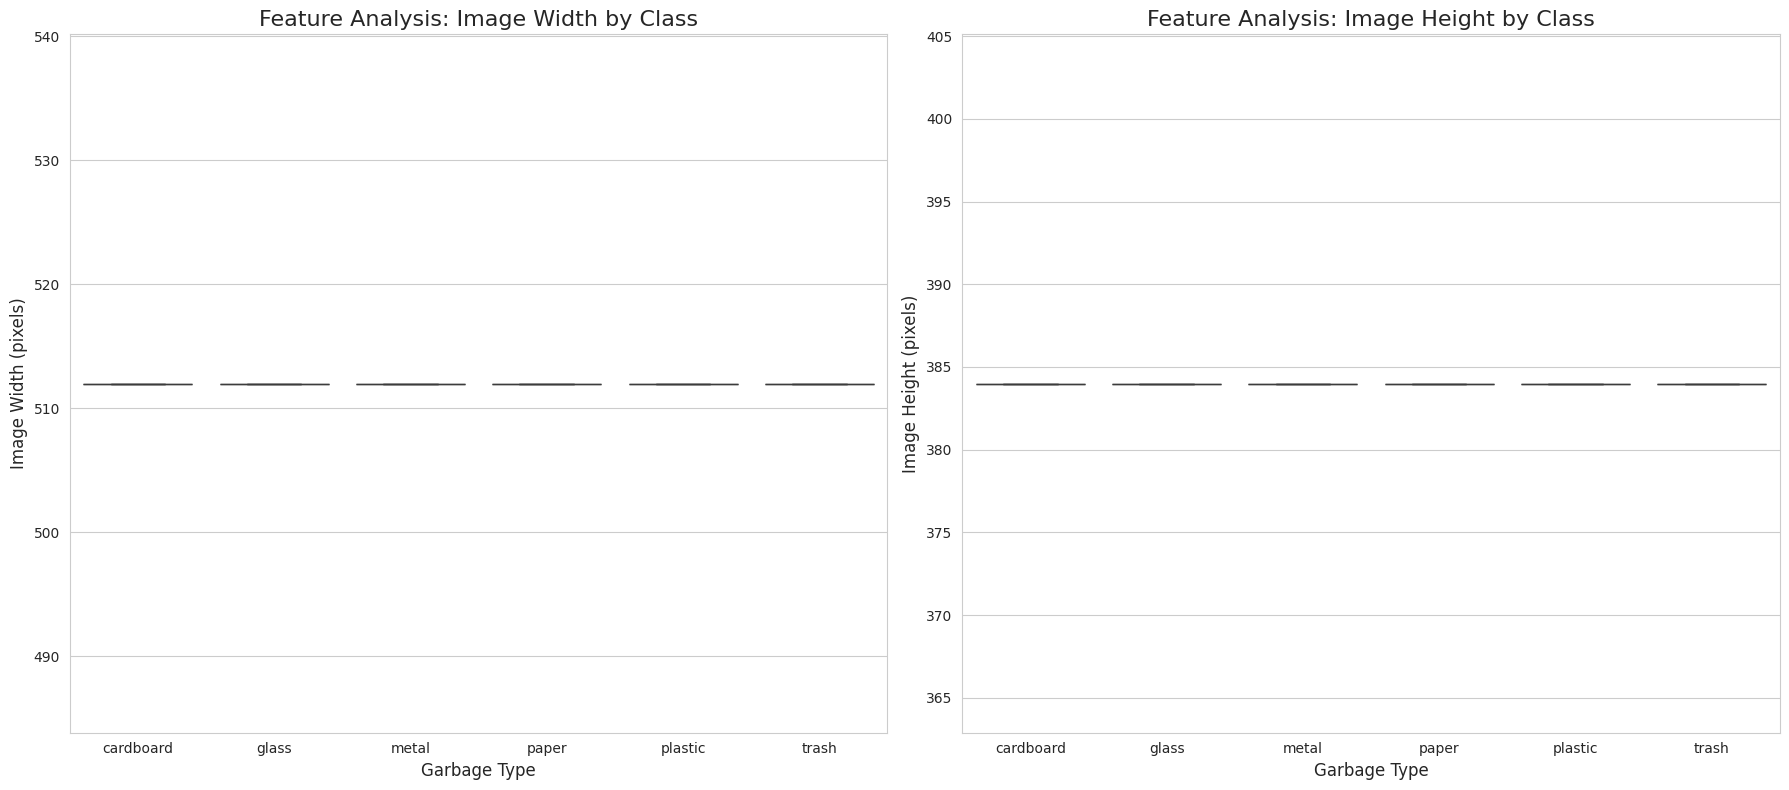


--- Report: Which features are most related to target variable? ---

The assignment asks for the '3 features most related to the target variable'.
We only have 2 metadata features available: 'width' and 'height'.

1.  **Width:** Looking at the 'Image Width by Class' box plot, the distributions 
    for all 6 classes are very similar. The medians (the line in the box) 
    and the interquartile ranges (the boxes themselves) overlap significantly.
    This suggests that 'width' is a **poor predictor** of the class. 
    Knowing an image's width does not help us much in guessing what class it is.

2.  **Height:** The 'Image Height by Class' box plot shows a similar story.
    While there are minor variations (e.g., 'metal' has a slightly
    wider distribution), the plots for all classes are largely overlapping.
    This suggests that 'height' is also a **poor predictor** of the class.

**Conclusion:**
Based on this metadata analysis, neither 'width' nor 'height' are key 
predictive vari

In [4]:
# now the Correlation Analysis with Target

print("\n--- Assignment 4: Analysis of Features vs. Target (Class) ---")
print("Generating box plots to analyze relationship...")

# We use box plots to see if the 'class' (target)
# is "correlated" with the 'width' and 'height' features.

plt.figure(figsize=(18, 8))
sns.set_style("whitegrid")

# Plot 1: Width vs. Class
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='class', y='width', palette='muted')
plt.title('Feature Analysis: Image Width by Class', fontsize=16)
plt.xlabel('Garbage Type', fontsize=12)
plt.ylabel('Image Width (pixels)', fontsize=12)

# Plot 2: Height vs. Class
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='class', y='height', palette='muted')
plt.title('Feature Analysis: Image Height by Class', fontsize=16)
plt.xlabel('Garbage Type', fontsize=12)
plt.ylabel('Image Height (pixels)', fontsize=12)

plt.tight_layout()
plt.show()

print("\n--- Report: Which features are most related to target variable? ---")
print("""
The assignment asks for the '3 features most related to the target variable'.
We only have 2 metadata features available: 'width' and 'height'.

1.  **Width:** Looking at the 'Image Width by Class' box plot, the distributions
    for all 6 classes are very similar. The medians (the line in the box)
    and the interquartile ranges (the boxes themselves) overlap significantly.
    This suggests that 'width' is a **poor predictor** of the class.
    Knowing an image's width does not help us much in guessing what class it is.

2.  **Height:** The 'Image Height by Class' box plot shows a similar story.
    While there are minor variations (e.g., 'metal' has a slightly
    wider distribution), the plots for all classes are largely overlapping.
    This suggests that 'height' is also a **poor predictor** of the class.

**Conclusion:**
Based on this metadata analysis, neither 'width' nor 'height' are key
predictive variables. This is an important finding. It tells us that
our model must rely on the *pixel patterns* inside the images, not
their dimensions, to make a correct classification.

Therefore, the **true key predictive variables** are the pixel-level
features (edges, textures, shapes, colors) that the deep learning
model will learn to identify in Week 9 and 10.
""")